# Data transformation

在底下的操作中以 [Titanic](https://www.kaggle.com/competitions/titanic/data?select=train.csv) 裡 train.csv 中的 Age 為例

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train.csv')
age = df['Age']
age = age.dropna() #處理好缺失值以免後面出錯

## discretization

這是一種把連續變項轉成離散變項的手法，通常將連續變項的值域切成若干等分作為區間。

In [8]:
from sklearn.preprocessing import KBinsDiscretizer

# KBinsDiscretizer 需要使用 2 維資料且不能有缺失值
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
trans = est.fit_transform(np.array(age).reshape(-1,1))

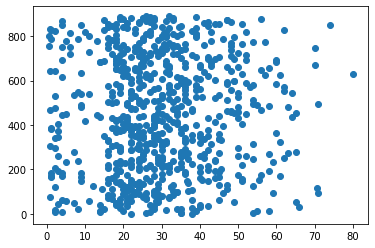

In [20]:
plt.scatter(age,age.index)
plt.show()

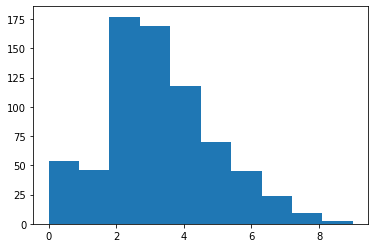

In [19]:
plt.hist(trans)
plt.show()

## encoding
- Label encoding

    將離散變量轉成數值表示， e.g. ['a','b','b','c'] $\rightarrow$ [0,1,1,2]

- one-hot encoding
    將離散變量轉成數值表示後，再將類別拆成多行，每行中用 0 或 1 表示， e.g. ['a','b','b','c'] $\rightarrow$ [0,1,1,2] $\downarrow$ 
    |var|att1|att2|att3|
    |-|-|-|-|
    |a|1|0|0|
    |b|0|1|0|
    |b|0|1|0|
    |c|0|0|1|

為了示範方便，以下使用 `['Amy','Jason','Emma']` 作為輸入資料

In [21]:
data = np.array(['Amy','Jason','Emma'])

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
result = le.fit_transform(data)
print(result)

[0 2 1]


In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
result = ohe.fit_transform(data.reshape(-1,1)).toarray()
print(result)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


## normalization/standardization
- MinMaxScaler

    將每筆資料縮放到 1-0 的區間 (區間可自己調)
- StandardScaler
    
    將資料轉為 Z-score

In [44]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
result = mm.fit_transform(np.array(age).reshape(-1,1))

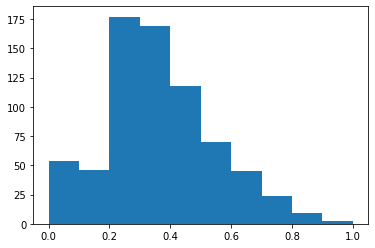

In [45]:
plt.hist(result)
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
result = ss.fit_transform(np.array(age).reshape(-1,1))

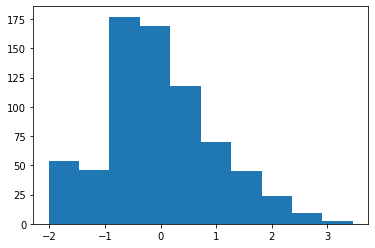

In [47]:
plt.hist(result)
plt.show()